### 1.1

In [19]:
letters <- read.csv("csv/letters.csv")
letters$isU <- ifelse(letters$letter=="U", T, F)
head(letters)

letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor,isU
U,7,11,8,9,4,3,9,6,7,11,11,10,3,9,2,6,TRUE
U,4,7,4,5,2,7,5,13,5,7,14,7,3,9,0,8,TRUE
U,5,6,5,4,2,5,8,6,8,9,8,8,3,9,2,5,TRUE
U,3,3,3,1,1,5,8,5,7,10,9,8,3,10,2,6,TRUE
U,5,7,6,5,5,8,8,8,5,6,7,9,4,8,4,5,TRUE
U,5,8,5,6,4,8,6,11,4,8,13,7,3,9,0,8,TRUE


### 1.2

In [18]:
library(caTools)
set.seed(1000)
spl <- sample.split(letters$isU, SplitRatio=0.6)
train.1 <- subset(letters, spl==T)
test.1 <- subset(letters, spl==F)

table(train.1$isU) # most frequent outcome is FALSE in training set
table(test.1$isU)
1529/(1529+325) ## accuracy of baseline


FALSE  TRUE 
 2294   488 


FALSE  TRUE 
 1529   325 

[1] 0.8247033

### 1.4

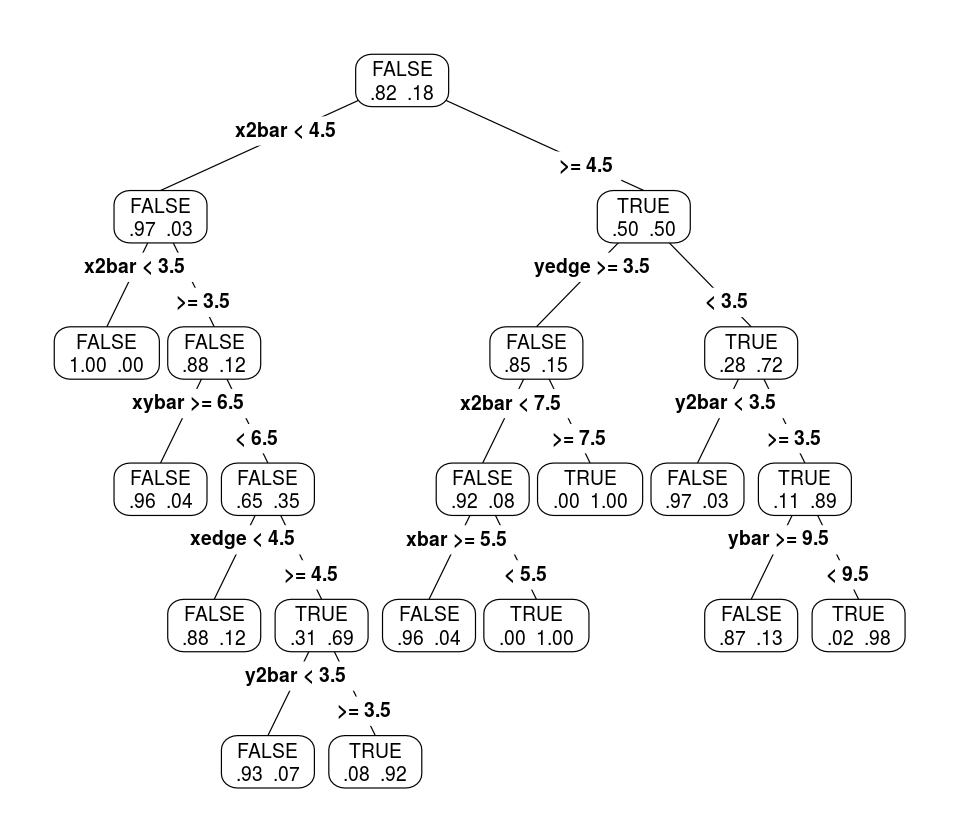

In [241]:
library(rpart)
library(rpart.plot)

model.1.cart <- rpart(isU~.-letter, data=train.1, method="class")
# summary(model.1.rpart)$var
options(repr.plot.width=8, repr.plot.height=7) # resize IRkernel plot size for jupyter
prp(model.1.cart, extra=4, type=4, branch=0)

### 1.5

In [28]:
2/12

[1] 0.1666667

### 1.6

In [97]:
predict.1.cart <- predict(model.1.cart, test.1, type="class")
table.1.cart <- table(predict.1.cart, test.1$isU)
table.1.cart
sum(diag(table.1.cart))/sum(table.1.cart) ## accuracy

              
predict.1.cart FALSE TRUE
         FALSE  1516   37
         TRUE     13  288

[1] 0.9730313

### 1.7

In [87]:
library(randomForest)
set.seed(2000)
model.1.rf <- randomForest(as.factor(isU)~.-letter, data=train.1)
predict.1.rf <- predict(model.1.rf, test.1)
table.1.rf <- table(predict.1.rf, test.1$isU)
table.1.rf
sum(diag(table.1.rf))/sum(table.1.rf) ## accuracy

            
predict.1.rf FALSE TRUE
       FALSE  1526    7
       TRUE      3  318

[1] 0.9946063

### 1.9

In [88]:
library(caTools)
set.seed(1000)
spl <- sample.split(letters$letter, SplitRatio=0.6)
train.1.9 <- subset(letters, spl==T)
test.1.9 <- subset(letters, spl==F)

### 1.10

In [95]:
model.1.cart2 <- rpart(letter~.-isU, data=train.1.9, method="class")
predict.1.cart2 <- predict(model.1.cart2, test.1.9, type="class")
table.1.cart2 <- table(predict.1.cart2, test.1.9$letter)
table.1.cart2
sum(diag(table.1.cart2))/sum(table.1.cart2) ## accuracy

               
predict.1.cart2   U   V   W   X   Y   Z
              U 262  19   2   0  27   0
              V   2 234  17   0  19   0
              W  43  44 282   4  19   1
              X  13   1   0 279   8  13
              Y   1   8   0   2 236   6
              Z   4   0   0  30   5 274

[1] 0.8447439

### 1.11

In [242]:
str(summary(model.1.cart2))
# options(repr.plot.width=8, repr.plot.height=8) # resize IRkernel plot size for jupyter
# prp(model.1.cart2, extra=4, type=4, branch=0)

Call:
rpart(formula = letter ~ . - isU, data = train.1.9, method = "class")
  n= 2781 

           CP nsplit rel error    xerror        xstd
1  0.16964675      0 1.0000000 1.0000000 0.008747972
2  0.16048844      1 0.8303532 0.8682948 0.010371573
3  0.13388574      2 0.6698648 0.7017008 0.011356311
4  0.11862189      3 0.5359791 0.5442652 0.011438625
5  0.09768862      4 0.4173572 0.4221544 0.010955496
6  0.02573048      5 0.3196686 0.3249019 0.010185034
7  0.01984300      6 0.2939381 0.2987353 0.009909149
8  0.01569996      8 0.2542521 0.2664631 0.009522389
9  0.01308330      9 0.2385521 0.2586132 0.009419904
10 0.01221108     10 0.2254688 0.2389882 0.009148083
11 0.01003053     11 0.2132577 0.2333188 0.009065196
12 0.01000000     12 0.2032272 0.2267771 0.008967005

Variable importance
    xedge xedgeycor     x2bar     y2bar    x2ybar     yedge      ybar     xybar 
       22        11        11        11        10        10         8         3 
yedgexcor     onpix      xbar    xy2bar 

### 1.12

cp
0


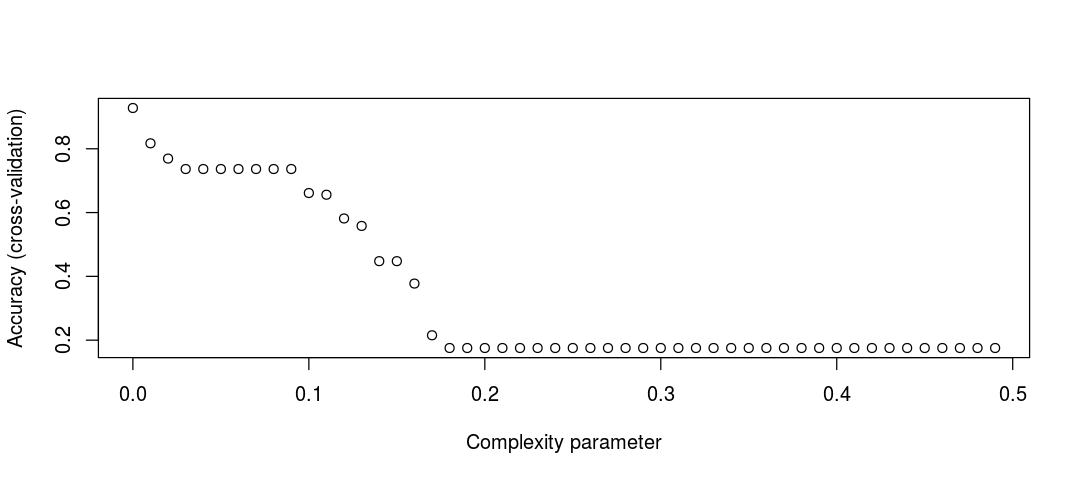

In [115]:
library(caret)

# initialise CART inner-model to use for cross-validation
control <- trainControl(method="cv", number=10, savePredictions="final")

# specify parameter grid to compute over (e.g. complexity parameter for CART)
grid <- expand.grid(cp=seq(0, 1, 0.01)) 

# train the model (WARNING: LONG COMPUTATION TIME)
set.seed(1000)
model.1.cartcv <- train(letter~.-isU, data=train.1.9, trControl=control, tuneGrid=grid, method="rpart")

# plot cp cross-validation results
model.1.cartcv$bestTune
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(model.1.cartcv$results$cp[1:50], model.1.cartcv$results$Accuracy[1:50],
     xlab="Complexity parameter",
     ylab="Accuracy (cross-validation)")

### 1.13 and 1.14

In [119]:
set.seed(2000)
model.1.rf2 <- randomForest(letter~.-isU, data=train.1.9)
predict.1.rf2 <- predict(model.1.rf2, test.1.9)
table.1.rf2 <- table(predict.1.rf2, test.1.9$letter)
table.1.rf2
sum(diag(table.1.rf2))/sum(table.1.rf2) ## accuracy

             
predict.1.rf2   U   V   W   X   Y   Z
            U 325   0   2   0   3   0
            V   0 300   0   0   1   0
            W   0   5 299   0   0   0
            X   0   0   0 315   0   2
            Y   0   1   0   0 310   0
            Z   0   0   0   0   0 292

[1] 0.9924528

### 2.1

In [219]:
universities <- read.csv("csv/universities.csv")
universitiesfull <- na.omit(universities)
head(universities)
NROW(universitiesfull)

name,state,type,apprec,appacc,newstud,newstudtop10,newstudtop25,ft,pt,instatetuition,outofstatetuition,room,board,addfees,bookcosts,personal,facphd,studfacratio,gradrate
Alaska Pacific University,AK,Private,193,146,55,16,44,249,869,7560,7560,1620,2500,130,800,1500,76,11.9,15
University of Alaska at Fairbanks,AK,Public,1852,1427,928,NA,NA,3885,4519,1742,5226,1800,1790,155,650,2304,67,10.0,NA
University of Alaska Southeast,AK,Public,146,117,89,4,24,492,1849,1742,5226,2514,2250,34,500,1162,39,9.5,39
University of Alaska at Anchorage,AK,Public,2065,1598,1162,NA,NA,6209,10537,1742,5226,2600,2520,114,580,1260,48,13.7,NA
Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,NA,NA,3958,305,1700,3400,1108,1442,155,500,850,53,14.3,40
Faulkner University,AL,Private,345,320,179,NA,27,1367,578,5600,5600,1550,1700,300,350,NA,52,32.8,55


[1] 471

### 2.2

In [220]:
universitiesreduced <- universitiesfull
universitiesreduced$state <- NULL
universitiesreduced$name <- NULL
universitiesreduced$type <- NULL

### 2.3

In [221]:
universities.scale <- universitiesreduced
for (i in 1:NCOL(universities.scale)) {
    universities.scale[,i] <- scale(universities.scale[,i])
}

min(universities.scale)
max(universities.scale)

[1] -3.912723

[1] 13.61017

### 2.4

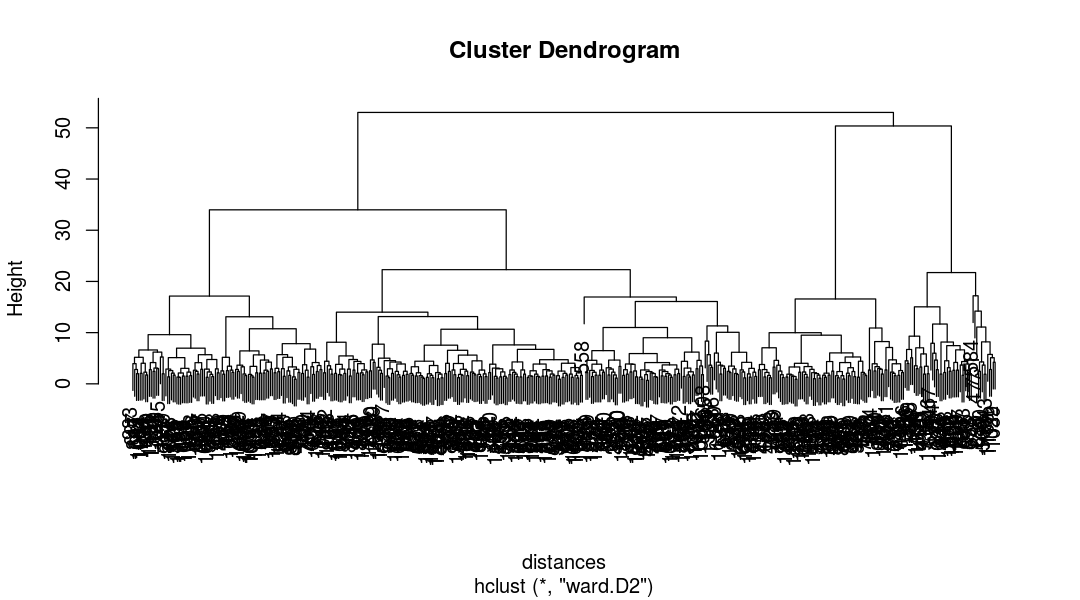

In [222]:
# computes distances
distances <- dist(universities.scale[,1:17], method="euclidean")

# performs hierach cluster analysis using the distances calculated
cluster.2 <- hclust(distances, method="ward.D2")
options(repr.plot.width=9, repr.plot.height=5) # resize IRkernel plot size
plot(cluster.2)

### 2.5

In [228]:
# cuts tree into k subclusters
size <- 12
clusterGroups <- cutree(cluster.2, k=size)
# how do we select k-value???


# Now, compute average value  across the cluster groups for ALL genres
categories <- matrix(0, nrow=NCOL(universities.scale), ncol=size)
for (i in 1:NCOL(universities.scale)) {
    categories[i,] <- tapply(universities.scale[,i], clusterGroups, mean)
}

# naming the matrix rows and columns
rownames(categories) <- colnames(universities.scale)
colnames(categories) <- c(1:size)
categories

,1,2,3,4,5,6,7,8,9,10,11,12
apprec,-0.49104564,-0.56725015,-0.07316315,-0.415880178,0.65889438,0.23069698,3.49913161,1.78118210,-0.39596094,1.35730638,-0.6251454,1.94118052
appacc,-0.50260701,-0.56011983,-0.11827795,-0.383263187,0.80777671,0.24836644,3.96656362,1.90878733,-0.35086382,0.57807009,-0.6657828,1.73101940
newstud,-0.50097008,-0.56896841,-0.30038031,-0.430873129,1.50107906,0.31813513,3.97807920,1.66835289,-0.14283908,0.51346441,-0.6309348,2.99606307
newstudtop10,-0.48399147,-0.68003959,1.21689607,0.008837911,-0.19009154,-0.59305434,0.39164372,0.27694365,-0.79211989,2.41824703,-1.4617919,-0.10891918
newstudtop25,-0.52918111,-0.80416477,1.20290273,0.115882652,-0.23590746,-0.44238059,0.74696320,0.44497635,-0.95768481,1.78102749,-1.7541439,-0.03207016
ft,-0.44383941,-0.54278798,-0.34583640,-0.442533810,1.82648583,0.44066434,4.08311284,1.53514320,-0.22731748,0.29898134,-0.6506299,2.77113605
pt,-0.24143734,-0.22964048,-0.41265957,-0.298909312,2.43363404,0.29139575,1.76616335,0.59995948,-0.08025541,-0.28500154,-0.3069320,13.61016586
instatetuition,-0.09472273,-0.09746257,1.37881370,0.397815795,-1.08350818,-1.16429072,-1.24318294,-0.55455644,-1.11678481,1.61556048,0.3305117,-1.13030036
outofstatetuition,-0.36102227,-0.34158973,1.49318066,0.270639569,-0.82229053,-0.92216891,-0.60550632,-0.03140829,-1.24798716,1.79609872,0.1518758,-0.37715330
room,-0.30499958,-0.25786784,0.74731343,0.018125556,-0.42330206,-0.17965265,-0.30558784,0.67800330,-1.07098899,1.62003783,2.2741430,-1.01390961


### 2.7

In [208]:
table(subset(universities$type, clusterGroups == 10))
(16)/(41+16)


Private  Public 
     41      16 

[1] 0.2807018

### 2.8

In [211]:
table(subset(universities$type, clusterGroups == 3))
(48)/(89+48)


Private  Public 
    106      66 

[1] 0.350365

### 2.9

In [230]:
# cuts tree into k subclusters
size <- 12
clusterGroups <- cutree(cluster.2, k=size)
# how do we select k-value???


# Now, compute average value  across the cluster groups for ALL genres
categories.full <- matrix(0, nrow=NCOL(universitiesreduced), ncol=size)
for (i in 1:NCOL(universitiesreduced)) {
    categories.full[i,] <- tapply(universitiesreduced[,i], clusterGroups, mean)
}

# naming the matrix rows and columns
rownames(categories.full) <- colnames(universitiesreduced)
colnames(categories.full) <- c(1:size)


# comparing tufts with the rest
tufts <- subset(universities, universities$name=="Tufts University")
tufts$name <- NULL
tufts$state <- NULL
tufts$type <- NULL
categories.full <- cbind(categories.full, t(as.matrix(tufts)))
categories.full

,1,2,3,4,5,6,7,8,9,10,11,12,476
apprec,1147.20690,836.81538,2849.30000,1453.36620,5831.07143,4086.96429,17399.75000,10402.30435,1534.50000,8675.800,601.0,11054.0,7614.0
appacc,804.55172,660.55385,1766.81667,1103.35915,4085.42857,2684.80357,11994.25000,6842.08696,1184.47917,3510.300,396.0,6397.0,3605.0
newstud,322.00000,259.73846,505.66667,386.18310,2155.14286,1072.00000,4423.16667,2308.30435,649.91667,1250.850,203.0,3524.0,1205.0
newstudtop10,19.06897,15.44615,50.50000,28.17606,24.50000,17.05357,35.25000,33.13043,13.37500,72.700,1.0,26.0,60.0
newstudtop25,44.89655,39.30769,80.10000,58.00704,50.85714,46.66071,70.83333,64.69565,36.18750,91.850,20.0,55.0,90.0
ft,1490.55172,1028.53846,1948.15000,1496.64789,12091.21429,5620.50000,22627.91667,10730.86957,2501.54167,4958.950,525.0,16502.0,4598.0
pt,424.24138,442.47692,159.56667,335.40141,4559.35714,1247.89286,3527.58333,1724.86957,673.39583,356.900,323.0,21836.0,NA
instatetuition,8884.06897,8868.95385,17013.26667,11601.30282,3429.14286,2983.48214,2548.25000,6347.26087,3245.56250,18319.350,11230.0,3171.0,19701.0
outofstatetuition,9018.55172,9102.33846,17013.26667,11742.07042,7029.71429,6599.07143,7964.41667,10439.73913,5194.25000,18319.350,11230.0,8949.0,19701.0
room,2003.58621,2037.20000,2754.08333,2234.03521,1919.21429,2092.98214,2003.16667,2704.65217,1457.29167,3376.500,3843.0,1498.0,3038.0


In [235]:
# calculating distance
dist(categories.full, method="euclidean")
tapply(t(tufts), clusterGroups, mean)
# ?tapply

                       apprec      appacc     newstud newstudtop10 newstudtop25
appacc            10628.13800                                                  
newstud           20445.03480 10302.63196                                      
newstudtop10      26953.75140 16870.79664  6778.68921                          
newstudtop25      26874.04538 16791.70028  6700.80044     99.12334             
ft                11112.34762 17568.40736 26912.08817  33663.28157  33587.23694
pt                22633.02222 19530.47818 19283.89426  23594.72801  23547.78783
instatetuition    33001.65006 34288.90566 36506.23410  38863.32284  38784.35388
outofstatetuition 30056.95814 33998.50890 38644.03314  42465.74153  42375.80943
room              21661.85715 12800.96246  6888.61397   8826.45697   8734.50292
board             21548.52487 12436.11247  5836.99997   8106.57341   8011.11628
addfees           25599.53430 15535.56484  5519.01459   1513.65054   1420.47059
bookcosts         25493.40067 15547.0211

ERROR: Error in tapply(t(tufts), clusterGroups, mean): arguments must have same length
